## Making Products Count: Data Science for Product Managers
Name: Vallabh Gajanan Karanjkar (vkaranjk)
HW 2: Clustering and Classification

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt 

import warnings
warnings.filterwarnings("ignore")

In [2]:
dataframe = pd.read_csv("analytic_data2021.csv", skiprows = [1])
dataframe

State FIPS Code  County FIPS Code  5-digit FIPS Code State Abbreviation  \
0                   0                 0                  0                 US   
1                   1                 0               1000                 AL   
2                   1                 1               1001                 AL   
3                   1                 3               1003                 AL   
4                   1                 5               1005                 AL   
...               ...               ...                ...                ...   
3189               56                37              56037                 WY   
3190               56                39              56039                 WY   
3191               56                41              56041                 WY   
3192               56                43              56043                 WY   
3193               56                45              56045                 WY   

                   Name  Release Year  County Ranked (Yes=1/No=0)  \
0         United States          2021                         NaN   
1               Alabama          2021                         NaN   
2        Autauga County          2021                         1.0   
3        Baldwin County          2021                         1.0   
4        Barbour County          2021                         1.0   
...                 ...           ...                         ...   
3189  Sweetwater County          2021                         1.0   
3190       Teton County          2021                         1.0   
3191       Uinta County          2021                         1.0   
3192    Washakie County          2021                         1.0   
3193      Weston County          2021                         1.0   

      Premature death raw value  Premature death numerator  \
0                   6906.641094                  3854074.0   
1                   9819.887431                    82249.0   
2                   7830.053484                      787.0   
3                   7680.477270                     3147.0   
4                  11476.629416                      515.0   
...                         ...                        ...   
3189                7775.070675                      527.0   
3190                2979.684888                      109.0   
3191                8081.051208                      271.0   
3192                6541.074150                      104.0   
3193                3858.465676                       76.0   

      Premature death denominator  ...  % Females raw value  \
0                     915437195.0  ...             0.507502   
1                      13651801.0  ...             0.516739   
2                        155765.0  ...             0.515080   
3                        600539.0  ...             0.515096   
4                         69011.0  ...             0.470793   
...                           ...  ...                  ...   
3189                     123565.0  ...             0.484968   
3190                      66075.0  ...             0.482526   
3191                      58124.0  ...             0.494512   
3192                      21447.0  ...             0.492249   
3193                      18989.0  ...             0.476830   

      % Females numerator  % Females denominator  % Females CI low  \
0               166582199              328239523               NaN   
1                 2533668                4903185               NaN   
2                   28777                  55869               NaN   
3                  114987                 223234               NaN   
4                   11622                  24686               NaN   
...                   ...                    ...               ...   
3189                20535                  42343               NaN   
3190                11322                  23464               NaN   
3191                10002                  20226               NaN   
31

In [3]:
#Remove the data for country as this is repetitive. Only keep county data
dataframe = dataframe[(dataframe["County Ranked (Yes=1/No=0)"]==1) | (dataframe["County Ranked (Yes=1/No=0)"]==0)]

In [4]:
dataframe = dataframe.filter(like="raw", axis=1)
dataframe

Premature death raw value  Poor or fair health raw value  \
2                   7830.053484                       0.198392   
3                   7680.477270                       0.164607   
4                  11476.629416                       0.298415   
5                  12172.562382                       0.238533   
6                  11096.050649                       0.219856   
...                         ...                            ...   
3189                7775.070675                       0.164432   
3190                2979.684888                       0.114117   
3191                8081.051208                       0.169134   
3192                6541.074150                       0.166508   
3193                3858.465676                       0.168859   

      Poor physical health days raw value  Poor mental health days raw value  \
2                                4.501499                           4.850214   
3                                3.647978                           4.768294   
4                                5.569267                           5.590494   
5                                4.894377                           5.271114   
6                                4.986622                           5.357809   
...                                   ...                                ...   
3189                             3.594866                           3.980964   
3190                             2.935199                           3.337136   
3191                             4.025276                           4.239036   
3192                             3.722334                           4.081120   
3193                             4.003704                           3.988498   

      Low birthweight raw value  Adult smoking raw value  \
2                      0.092018                 0.198108   
3                      0.082920                 0.185133   
4                      0.113553                 0.255308   
5                      0.102210                 0.230848   
6                      0.074305                 0.229550   
...                         ...                      ...   
3189                   0.100567                 0.185086   
3190                   0.078143                 0.128844   
3191                   0.099950                 0.207645   
3192                   0.078176                 0.194425   
3193                   0.059426                 0.206386   

      Adult obesity raw value  Food environment index raw value  \
2                       0.330                               6.7   
3                       0.300                               7.8   
4                       0.412                               5.5   
5                       0.374                               7.6   
6                       0.330                               7.9   
...                       ...                               ...   
3189                    0.303                               7.5   
3190                    0.110                               8.3   
3191                    0.352                               7.3   
3192                    0.292                               8.0   
3193                    0.372                               7.7   

      Physical inactivity raw value  \
2                             0.306   
3                             0.247   
4                             0.280   
5                             0.334   
6                             0.333   
...                             ...   
3189                          0.244   
3190                          0.108   
3191                          0.251   
3192                          0.287   
3193                          0.255   

      Access to exercise opportunities raw value  ...  \
2                                       0.691301  ...   
3                                       0.737135  ...   
4                                       0.531668  ...   
5                            

In [5]:
dataframe.describe()
#This is preliminary analysis which gives mean and std deviation

Premature death raw value  Poor or fair health raw value  \
count                3081.000000                    3142.000000   
mean                 8499.573851                       0.201157   
std                  2711.729396                       0.051169   
min                  1625.721002                       0.085909   
25%                  6618.799902                       0.161705   
50%                  8209.092668                       0.195168   
75%                 10012.354468                       0.235638   
max                 34538.518580                       0.419192   

       Poor physical health days raw value  Poor mental health days raw value  \
count                          3142.000000                        3142.000000   
mean                              4.391494                           4.672834   
std                               0.776739                           0.665472   
min                               2.365104                           2.693138   
25%                               3.822062                           4.223100   
50%                               4.379742                           4.706100   
75%                               4.898013                           5.125508   
max                               8.301600                           7.287595   

       Low birthweight raw value  Adult smoking raw value  \
count                3037.000000              3142.000000   
mean                    0.081821                 0.213234   
std                     0.020504                 0.041526   
min                     0.027778                 0.070756   
25%                     0.067885                 0.185885   
50%                     0.078947                 0.211144   
75%                     0.091575                 0.240368   
max                     0.250000                 0.445719   

       Adult obesity raw value  Food environment index raw value  \
count              3142.000000                       3123.000000   
mean                  0.334500                          7.445821   
std                   0.059741                          1.150772   
min                   0.110000                          0.000000   
25%                   0.296000                          6.900000   
50%                   0.338000                          7.600000   
75%                   0.374000                          8.200000   
max                   0.589000                         10.000000   

       Physical inactivity raw value  \
count                    3142.000000   
mean                        0.266775   
std                         0.058441   
min                         0.089000   
25%                         0.227000   
50%                         0.264000   
75%                         0.306000   
max                         0.504000   

       Access to exercise opportunities raw value  ...  \
count                                 3136.000000  ...   
mean                                     0.628140  ...   
std                                      0.233658  ...   
min                                      0.000000  ...   
25%                                      0.485074  ...   
50%                                      0.658445  ...   
75%                                      0.801675  ...   
max                                      1.000000  ...   

       % 65 and older raw value  % Non-Hispanic Black raw value  \
count               3142.000000                     3142.000000   
mean                   0.197573                        0.090088   
std                    0.048091                        0.142817   
min                    0.048593                        0.000000   
25%                    0.166828                        0.007471   
50%                    0.194020                        0.022298   
75%                    0.223036                        0.102352   
max                    0.581740                        0.858700   

       % American Indi

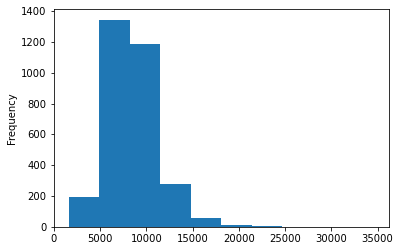

In [6]:
dataframe["Premature death raw value"].plot.hist()
plt.rcParams["figure.figsize"] = (10,3)
plt.show()

In [7]:
correlation = dataframe.corr(method='pearson', min_periods=1)

In [8]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(60,32)})

<AxesSubplot:>

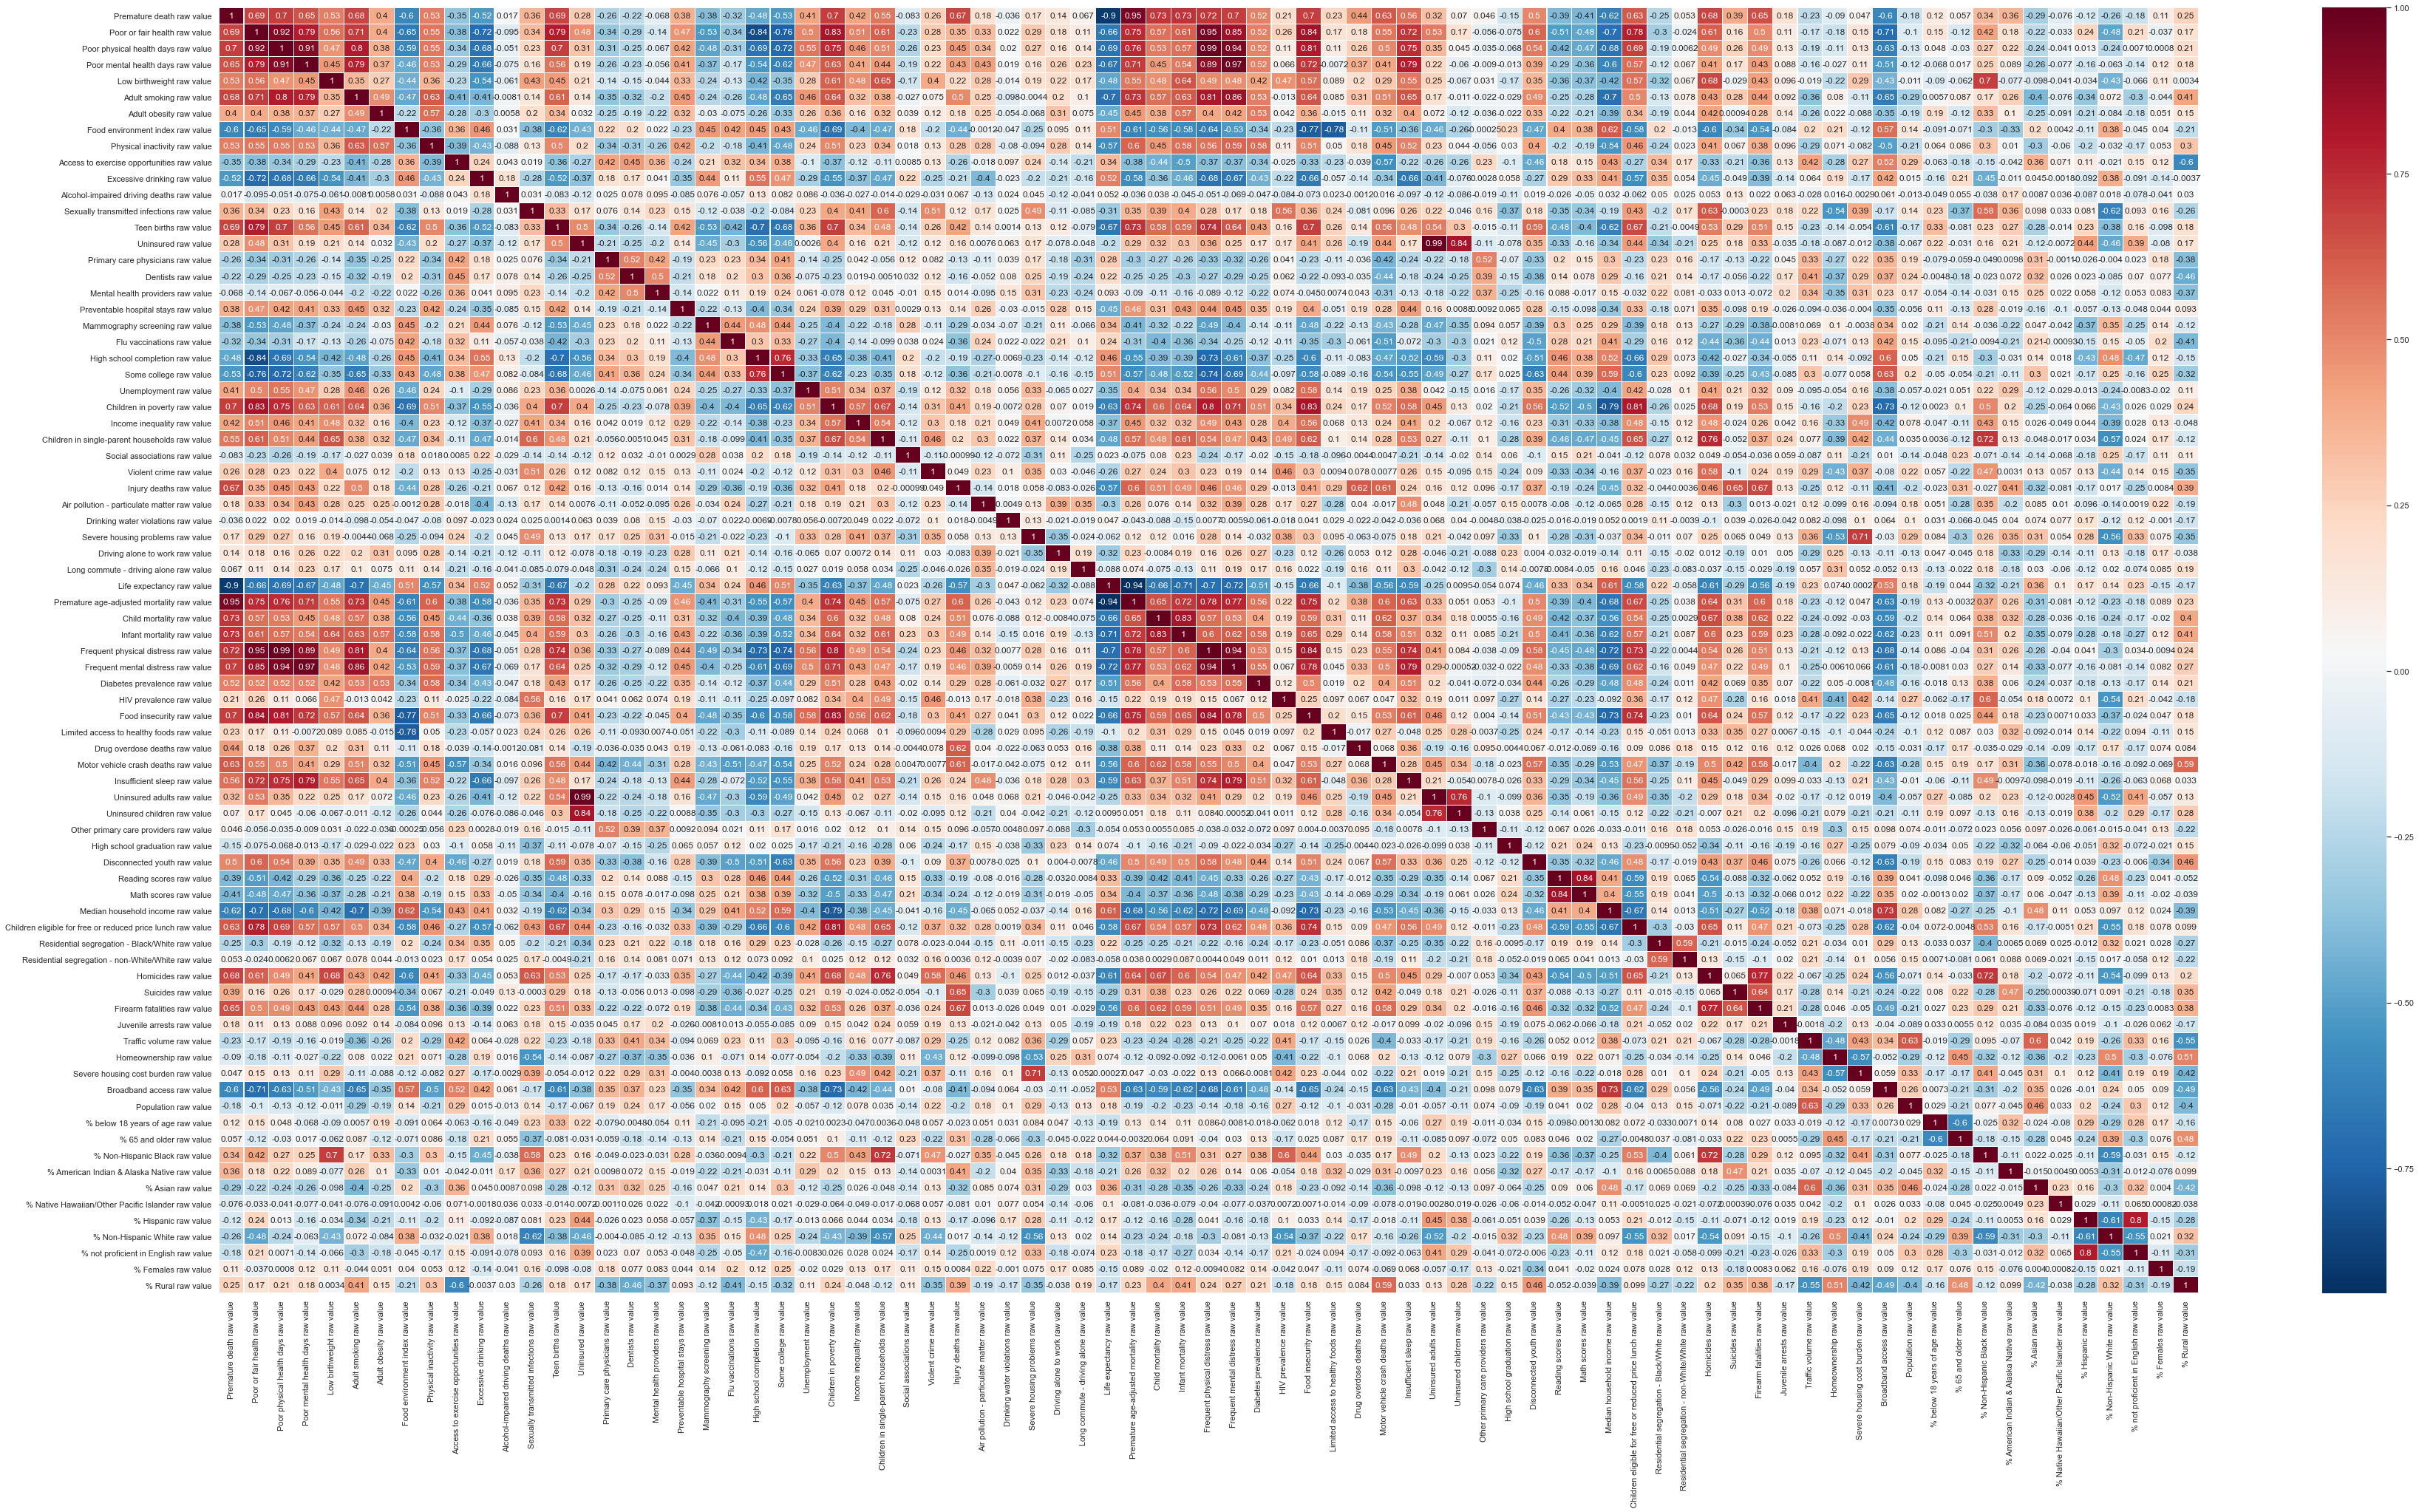

In [9]:
sns.heatmap(correlation, 
            xticklabels=correlation.columns,
            yticklabels=correlation.columns,
            cmap="RdBu_r",
            annot=True,
            linewidths=0.1)

For Exploratory data analysis the steps involved are stated below:
1. Check for the relevant data based on the documentation provided and filtering the data
2. Check the correlation of each variable with the dependent variable to gauge which column is highly correlated.
3. Plot histogram


In [10]:
#According to the documentation the ranked measures contribute
#the most towards explaining the model, hence the assumption is these
#ranked measures are used for model building and prediction

dataframe.drop(dataframe.iloc[:,35:], inplace = True, axis=1)

In [11]:
dataframe

Premature death raw value  Poor or fair health raw value  \
2                   7830.053484                       0.198392   
3                   7680.477270                       0.164607   
4                  11476.629416                       0.298415   
5                  12172.562382                       0.238533   
6                  11096.050649                       0.219856   
...                         ...                            ...   
3189                7775.070675                       0.164432   
3190                2979.684888                       0.114117   
3191                8081.051208                       0.169134   
3192                6541.074150                       0.166508   
3193                3858.465676                       0.168859   

      Poor physical health days raw value  Poor mental health days raw value  \
2                                4.501499                           4.850214   
3                                3.647978                           4.768294   
4                                5.569267                           5.590494   
5                                4.894377                           5.271114   
6                                4.986622                           5.357809   
...                                   ...                                ...   
3189                             3.594866                           3.980964   
3190                             2.935199                           3.337136   
3191                             4.025276                           4.239036   
3192                             3.722334                           4.081120   
3193                             4.003704                           3.988498   

      Low birthweight raw value  Adult smoking raw value  \
2                      0.092018                 0.198108   
3                      0.082920                 0.185133   
4                      0.113553                 0.255308   
5                      0.102210                 0.230848   
6                      0.074305                 0.229550   
...                         ...                      ...   
3189                   0.100567                 0.185086   
3190                   0.078143                 0.128844   
3191                   0.099950                 0.207645   
3192                   0.078176                 0.194425   
3193                   0.059426                 0.206386   

      Adult obesity raw value  Food environment index raw value  \
2                       0.330                               6.7   
3                       0.300                               7.8   
4                       0.412                               5.5   
5                       0.374                               7.6   
6                       0.330                               7.9   
...                       ...                               ...   
3189                    0.303                               7.5   
3190                    0.110                               8.3   
3191                    0.352                               7.3   
3192                    0.292                               8.0   
3193                    0.372                               7.7   

      Physical inactivity raw value  \
2                             0.306   
3                             0.247   
4                             0.280   
5                             0.334   
6                             0.333   
...                             ...   
3189                          0.244   
3190                          0.108   
3191                          0.251   
3192                          0.287   
3193                          0.255   

      Access to exercise opportunities raw value  ...  \
2                                       0.691301  ...   
3                                       0.737135  ...   
4                                       0.531668  ...   
5                            

In [12]:
correlation = dataframe.corr(method='pearson', min_periods=1)
#Compute pearson correlation

<AxesSubplot:>

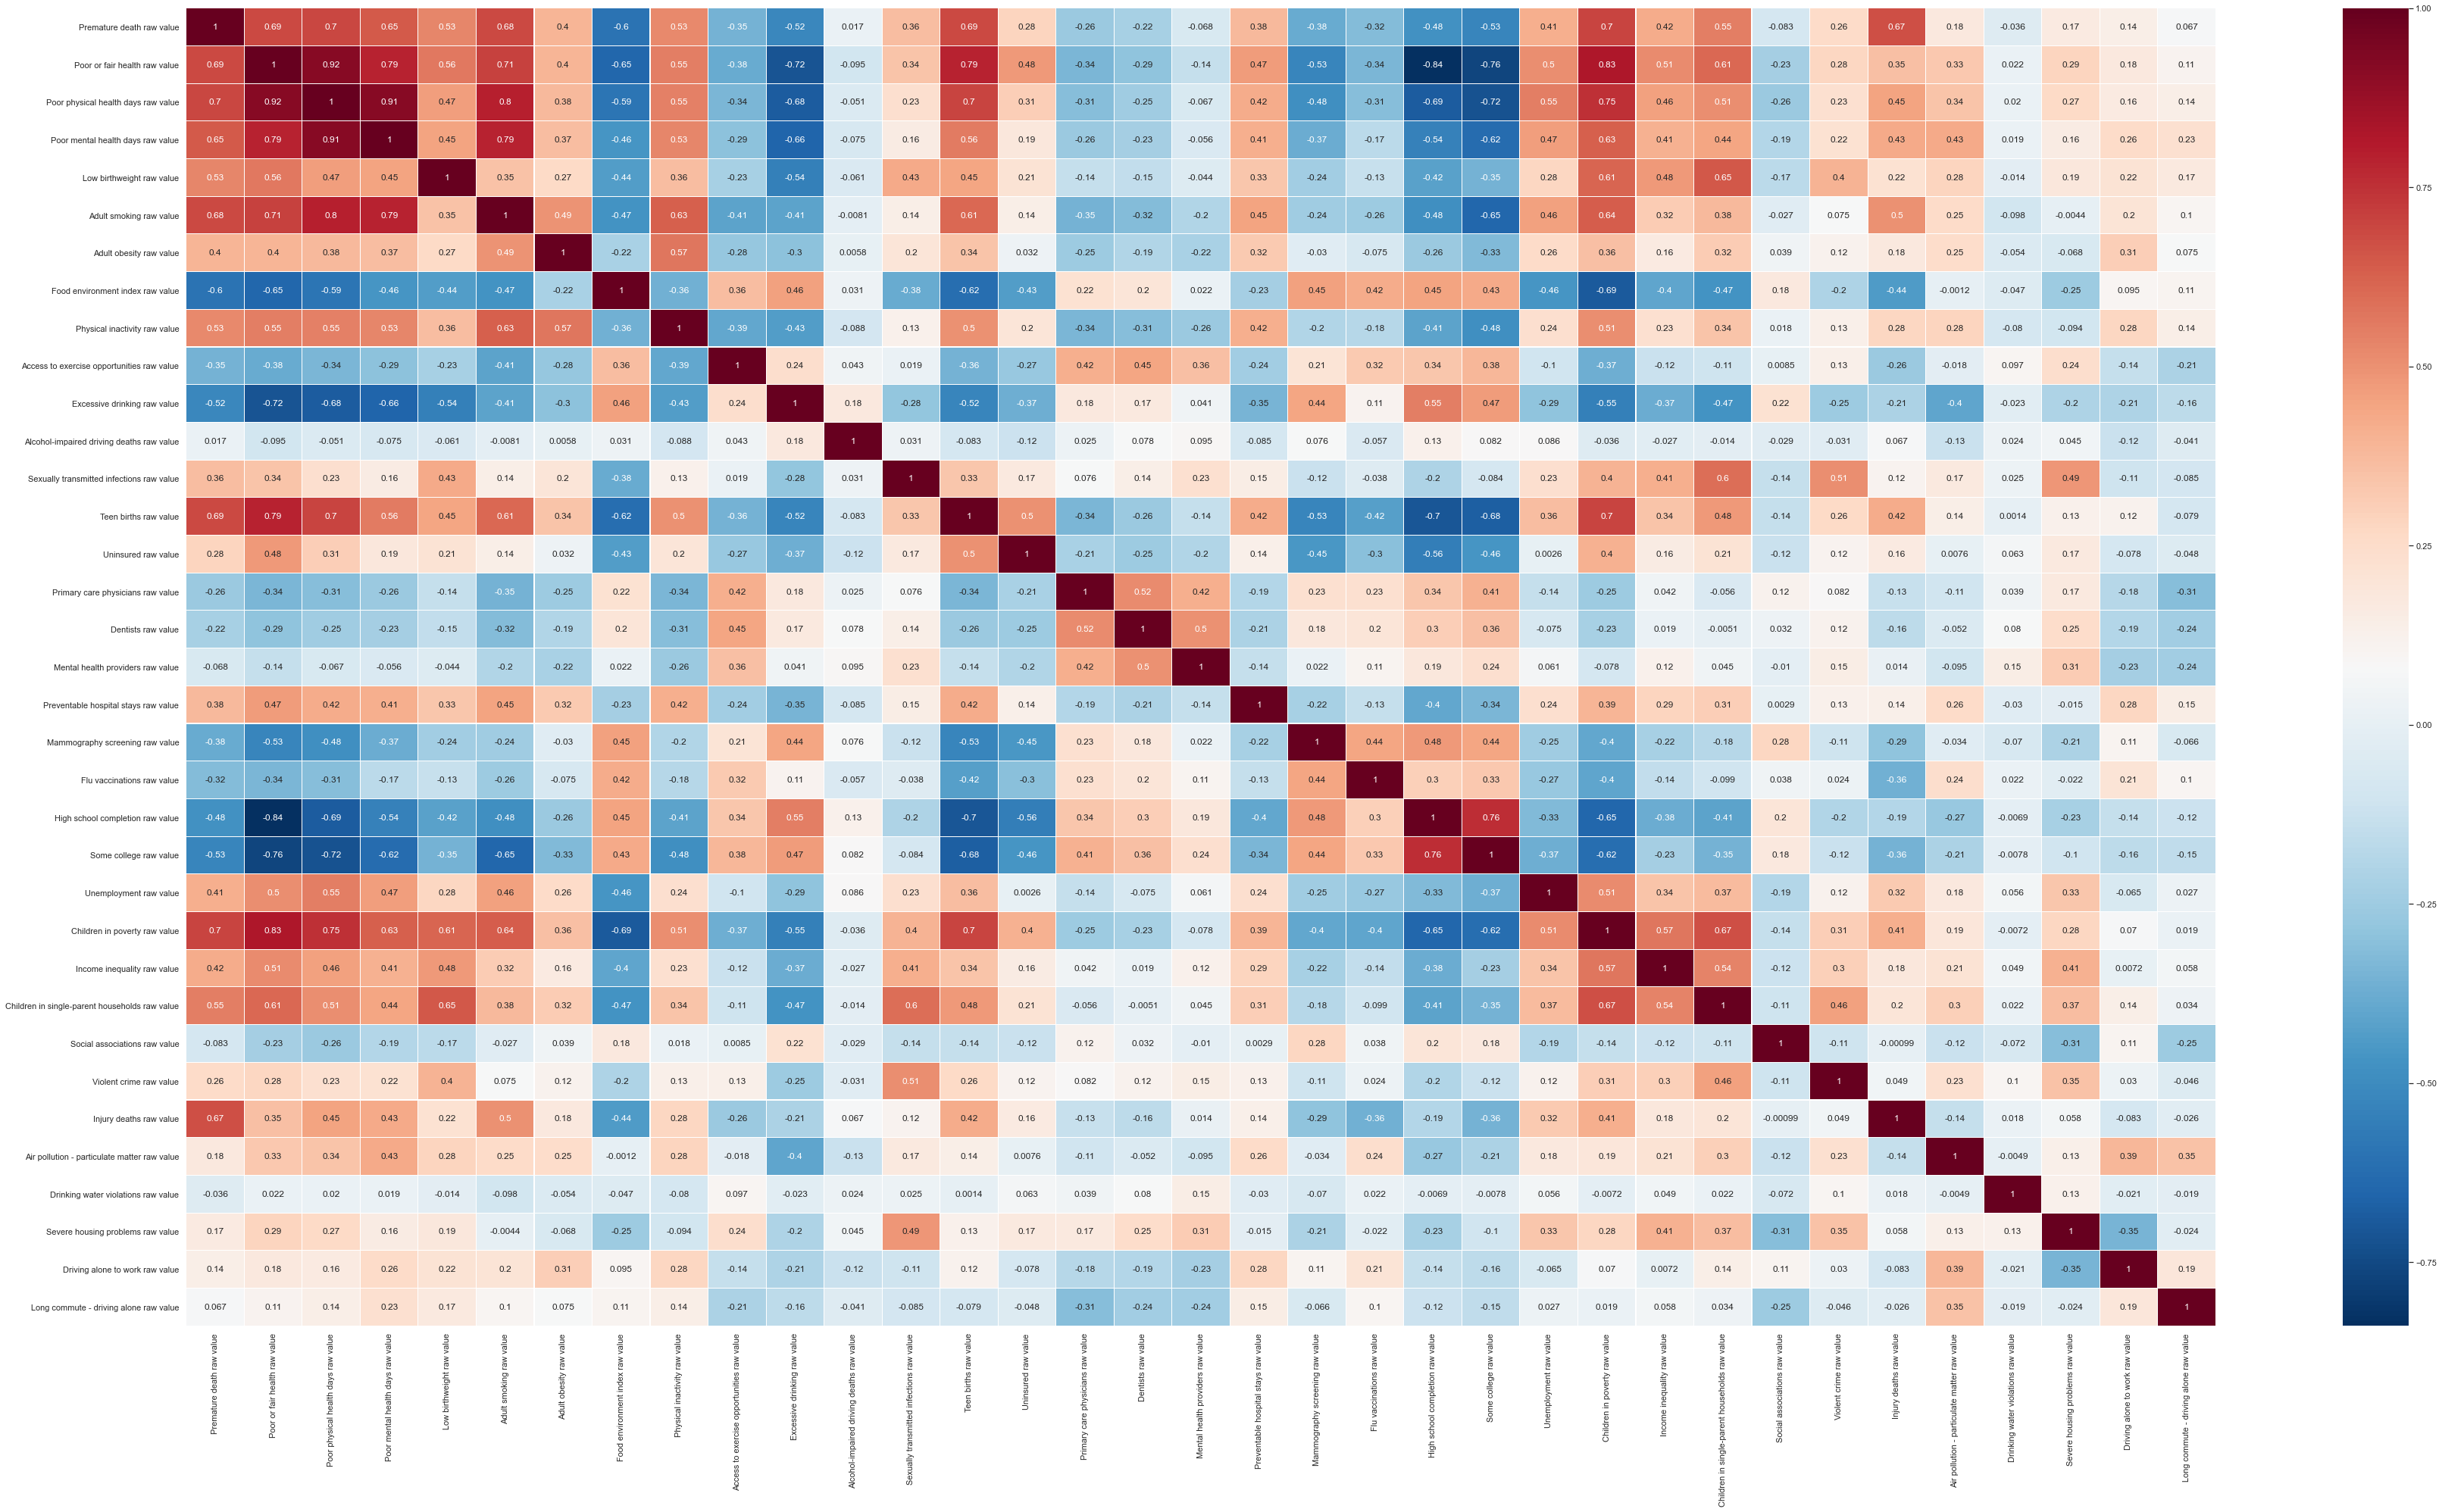

In [13]:
sns.heatmap(correlation, 
            xticklabels=correlation.columns,
            yticklabels=correlation.columns,
            cmap="RdBu_r",
            annot=True,
            linewidths=0.1)
#According to the below heat map it can be seen that majority of the 
#variables are correlated with premature death

To detect the outliers in the code.
Check the datapoint range and accomodate all the datapoints in the 1.5*InterQuartile range. This way all the data will be accomodated in 3 std deviations

In [14]:
Q1 = dataframe.quantile(0.25)
Q3 = dataframe.quantile(0.75)
IQR = Q3-Q1

In [15]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR


In [16]:
processedDataframe = np.where(dataframe < lower_limit, lower_limit,dataframe)
processedDataframe = np.where(dataframe > upper_limit, upper_limit,dataframe)

In [17]:
processedDataframe = pd.DataFrame(processedDataframe, columns=[dataframe.columns])

In [18]:
processedDataframe = processedDataframe.fillna(processedDataframe.mean())

In [19]:
processedDataframe.describe()
#Summary Statistics

Premature death raw value Poor or fair health raw value  \
count               3142.000000                   3142.000000   
mean                8444.509209                      0.200941   
std                 2480.337689                      0.050465   
min                 1625.721002                      0.085909   
25%                 6657.687924                      0.161705   
50%                 8262.525671                      0.195168   
75%                 9969.018662                      0.235638   
max                15102.686317                      0.346538   

      Poor physical health days raw value Poor mental health days raw value  \
count                         3142.000000                       3142.000000   
mean                             4.389274                          4.671913   
std                              0.769555                          0.662618   
min                              2.365104                          2.693138   
25%                              3.822062                          4.223100   
50%                              4.379742                          4.706100   
75%                              4.898013                          5.125508   
max                              6.511941                          6.479120   

      Low birthweight raw value Adult smoking raw value  \
count               3142.000000             3142.000000   
mean                   0.081292                0.213025   
std                    0.018482                0.040823   
min                    0.027778                0.070756   
25%                    0.068420                0.185885   
50%                    0.079722                0.211144   
75%                    0.090781                0.240368   
max                    0.127110                0.322094   

      Adult obesity raw value Food environment index raw value  \
count             3142.000000                      3142.000000   
mean                 0.334359                         7.445821   
std                  0.059319                         1.147287   
min                  0.110000                         0.000000   
25%                  0.296000                         6.900000   
50%                  0.338000                         7.600000   
75%                  0.374000                         8.200000   
max                  0.491000                        10.000000   

      Physical inactivity raw value  \
count                   3142.000000   
mean                       0.266672   
std                        0.058123   
min                        0.089000   
25%                        0.227000   
50%                        0.264000   
75%                        0.306000   
max                        0.424500   

      Access to exercise opportunities raw value  ...  \
count                                3142.000000  ...   
mean                                    0.628140  ...   
std                                     0.233434  ...   
min                                     0.000000  ...   
25%                                     0.485355  ...   
50%                                     0.657958  ...   
75%                                     0.801358  ...   
max                                     1.000000  ...   

      Income inequality raw value  \
count                 3142.000000   
mean                     4.483280   
std                      0.692253   
min                      2.411058   
25%                      3.989931   
50%                      4.378055   
75%                      4.868422   
max                      6.186809   

      Children in single-parent households raw value  \
count                                    3142.000000   
mean                                        0.240771   
std                                         0.089883   
min                                         0.000000   
25%                                         0.179707   
50%                                         0

In [20]:
y = processedDataframe.drop(processedDataframe.iloc[:,1:], axis=1)

In [21]:
y #Dependent variable

Premature death raw value
0                  7830.053484
1                  7680.477270
2                 11476.629416
3                 12172.562382
4                 11096.050649
...                        ...
3137               7775.070675
3138               2979.684888
3139               8081.051208
3140               6541.074150
3141               3858.465676

[3142 rows x 1 columns]

In [22]:
X = processedDataframe.drop(processedDataframe.iloc[:,0:5], axis=1)

In [23]:
X #Independent variables

Adult smoking raw value Adult obesity raw value  \
0                   0.198108                   0.330   
1                   0.185133                   0.300   
2                   0.255308                   0.412   
3                   0.230848                   0.374   
4                   0.229550                   0.330   
...                      ...                     ...   
3137                0.185086                   0.303   
3138                0.128844                   0.110   
3139                0.207645                   0.352   
3140                0.194425                   0.292   
3141                0.206386                   0.372   

     Food environment index raw value Physical inactivity raw value  \
0                                 6.7                         0.306   
1                                 7.8                         0.247   
2                                 5.5                         0.280   
3                                 7.6                         0.334   
4                                 7.9                         0.333   
...                               ...                           ...   
3137                              7.5                         0.244   
3138                              8.3                         0.108   
3139                              7.3                         0.251   
3140                              8.0                         0.287   
3141                              7.7                         0.255   

     Access to exercise opportunities raw value Excessive drinking raw value  \
0                                      0.691301                     0.144739   
1                                      0.737135                     0.187370   
2                                      0.531668                     0.124670   
3                                      0.162514                     0.154206   
4                                      0.156345                     0.158333   
...                                         ...                          ...   
3137                                   0.896863                     0.191880   
3138                                   0.997182                     0.237739   
3139                                   0.840184                     0.184073   
3140                                   0.831829                     0.193291   
3141                                   0.630272                     0.197149   

     Alcohol-impaired driving deaths raw value  \
0                                     0.333333   
1                                     0.296089   
2                                     0.393939   
3                                     0.296296   
4                                     0.182927   
...                                        ...   
3137                                  0.210526   
3138                                  0.272727   
3139                                  0.166667   
3140                                  0.000000   
3141                                  0.400000   

     Sexually transmitted infections raw value Teen births raw value  \
0                                        504.5             23.764041   
1                                        297.2             26.006904   
2                                        755.8             37.114262   
3                                        613.2             37.786446   
4                                        303.4             31.239778   
...                                        ...                   ...   
3137                                     307.8             29.262970   
3138                                     382.5              9.343066   
3139                                     204.9             27.727907   
3140                                     334.8             23.468804   
3141                                     173.2             21.915584   

     Uninsured raw value  ... Income inequality raw 

In [24]:
X.describe()

Adult smoking raw value Adult obesity raw value  \
count             3142.000000             3142.000000   
mean                 0.213025                0.334359   
std                  0.040823                0.059319   
min                  0.070756                0.110000   
25%                  0.185885                0.296000   
50%                  0.211144                0.338000   
75%                  0.240368                0.374000   
max                  0.322094                0.491000   

      Food environment index raw value Physical inactivity raw value  \
count                      3142.000000                   3142.000000   
mean                          7.445821                      0.266672   
std                           1.147287                      0.058123   
min                           0.000000                      0.089000   
25%                           6.900000                      0.227000   
50%                           7.600000                      0.264000   
75%                           8.200000                      0.306000   
max                          10.000000                      0.424500   

      Access to exercise opportunities raw value Excessive drinking raw value  \
count                                3142.000000                  3142.000000   
mean                                    0.628140                     0.190941   
std                                     0.233434                     0.034293   
min                                     0.000000                     0.064530   
25%                                     0.485355                     0.165848   
50%                                     0.657958                     0.189491   
75%                                     0.801358                     0.214492   
max                                     1.000000                     0.287456   

      Alcohol-impaired driving deaths raw value  \
count                               3142.000000   
mean                                   0.270457   
std                                    0.131220   
min                                    0.000000   
25%                                    0.190476   
50%                                    0.266667   
75%                                    0.343351   
max                                    0.580819   

      Sexually transmitted infections raw value Teen births raw value  \
count                               3142.000000           3142.000000   
mean                                 394.706953             27.835961   
std                                  214.408506             12.728825   
min                                   37.300000              2.098695   
25%                                  235.600000             18.483215   
50%                                  348.500000             27.438985   
75%                                  497.750000             35.754444   
max                                  921.987500             64.072446   

      Uninsured raw value  ... Income inequality raw value  \
count         3142.000000  ...                 3142.000000   
mean             0.114652  ...                    4.483280   
std              0.049325  ...                    0.692253   
min              0.023830  ...                    2.411058   
25%              0.075117  ...                    3.989931   
50%              0.106335  ...                    4.378055   
75%              0.145657  ...                    4.868422   
max              0.251508  ...                    6.186809   

      Children in single-parent households raw value  \
count                                    3142.000000   
mean                                        0.240771   
std                                         0.089883   
min                                         0.000000   
25%                                         0.179707   
50%                                         0.228763   
75%                                         

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                     random_state=0)

In [26]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()


In [27]:
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.transform(X_test)

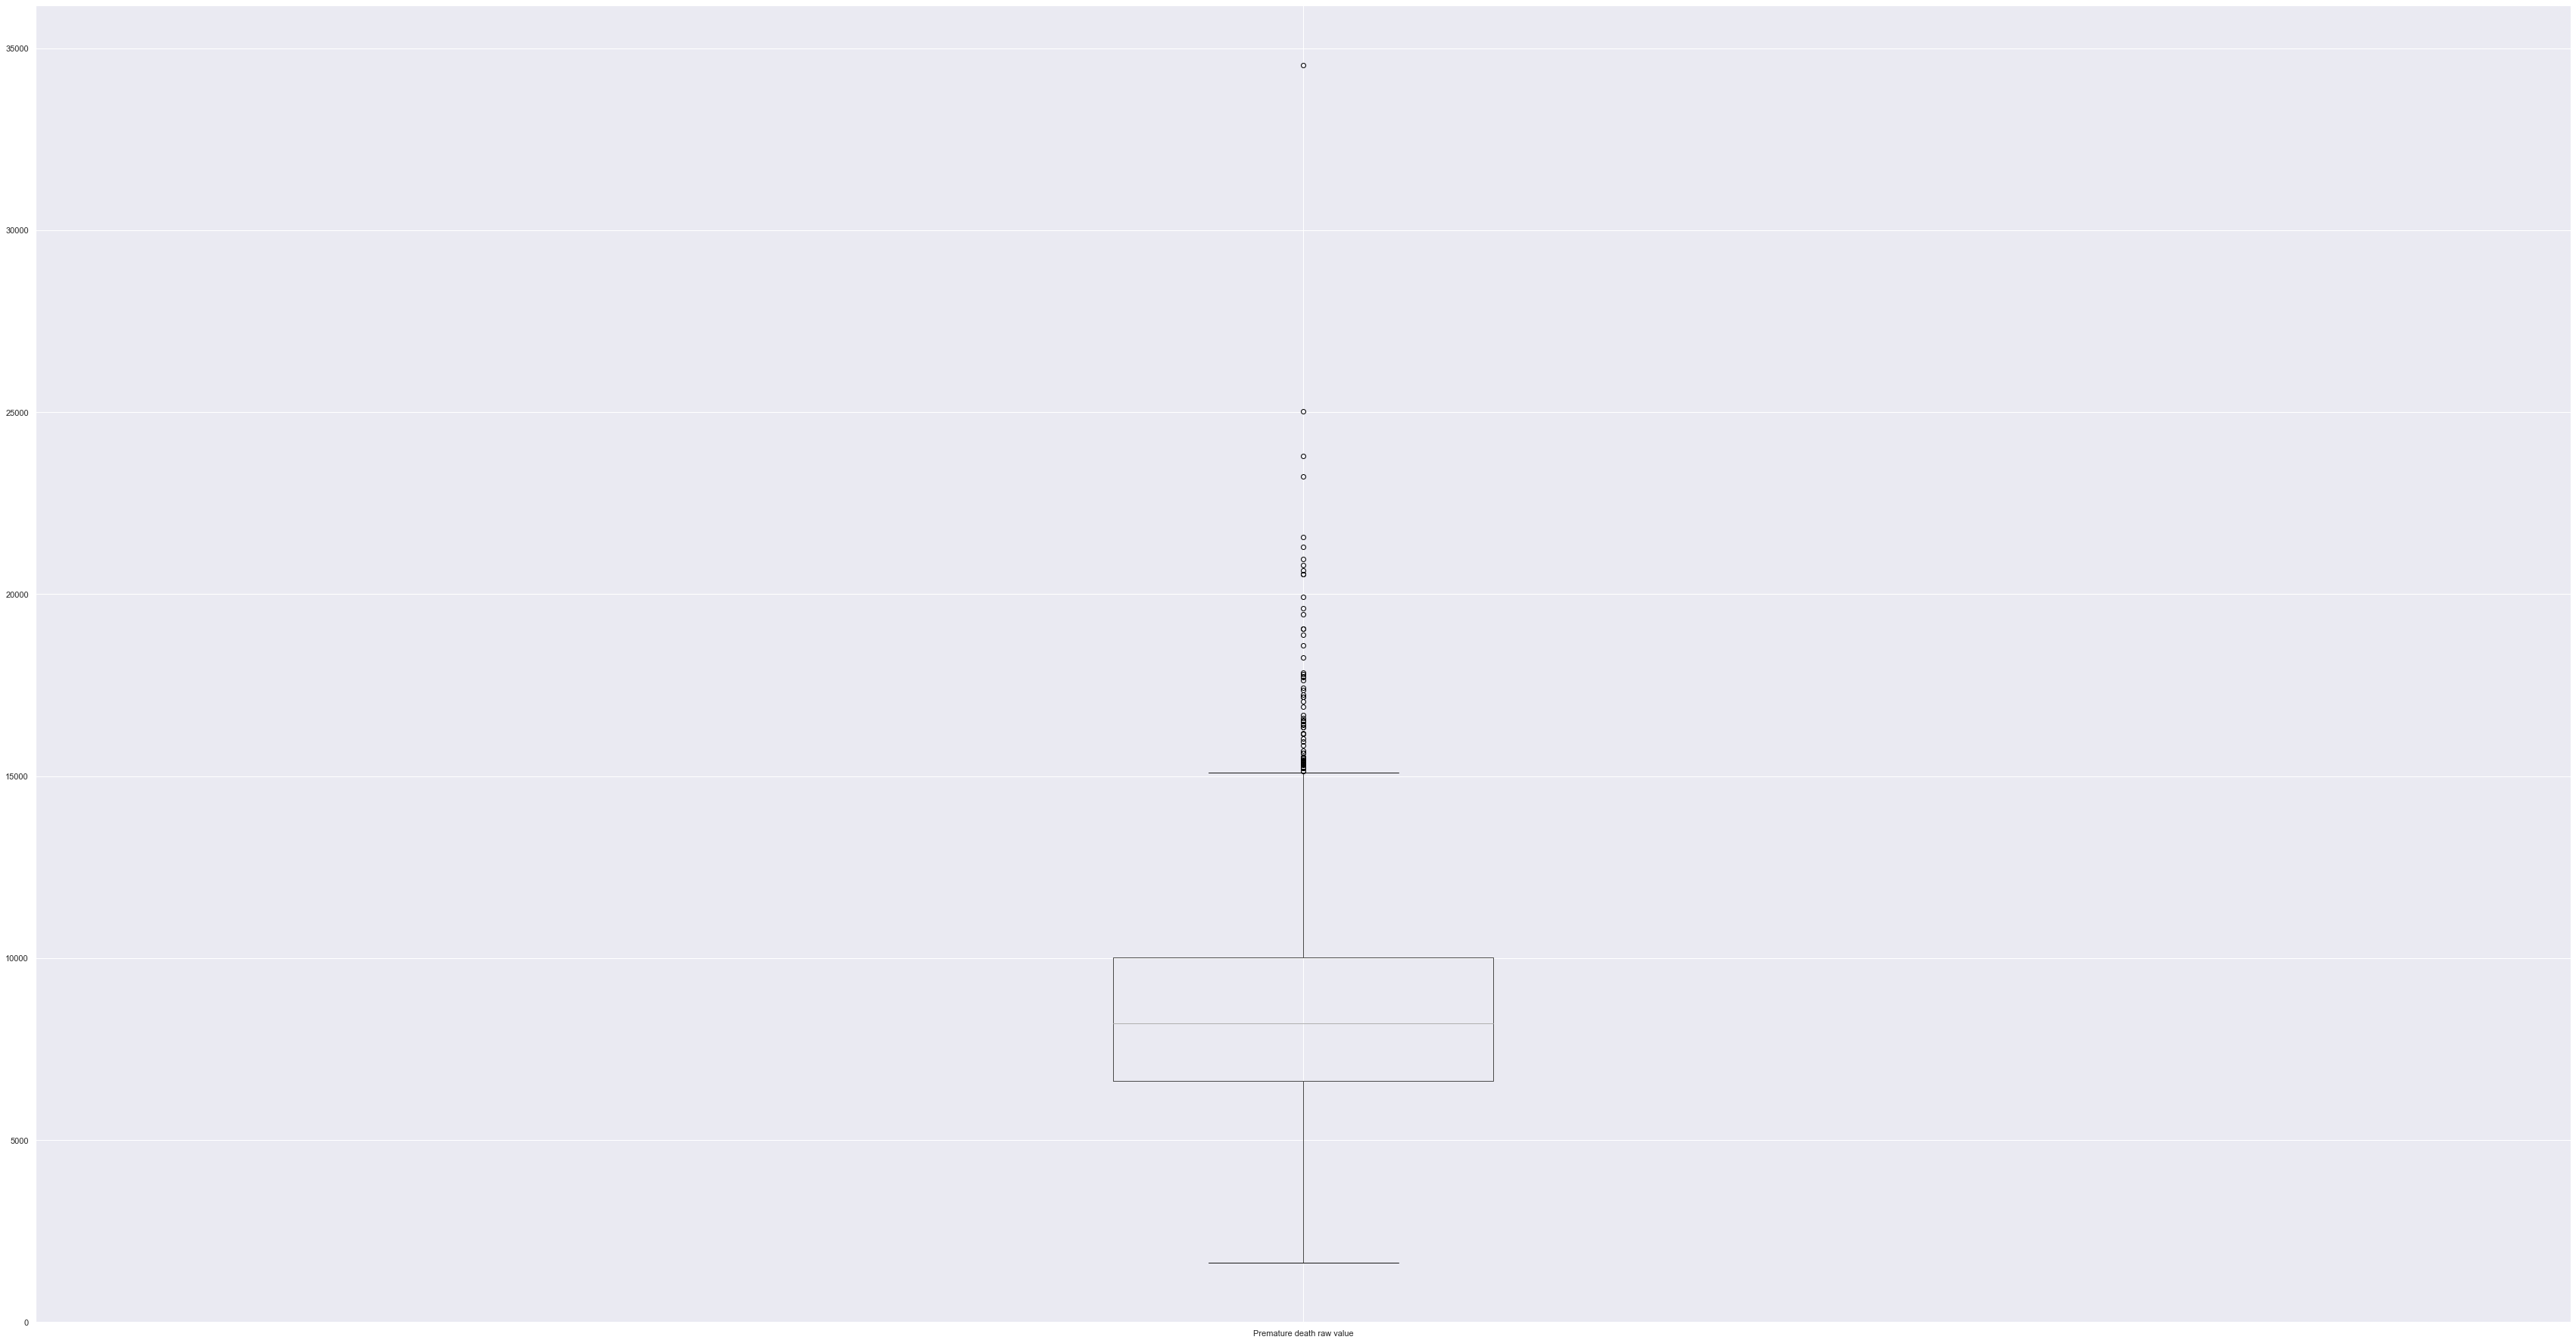

In [28]:
#The below box plot shows untreated data
dataframe.boxplot(column='Premature death raw value')
plt.rcParams["figure.figsize"] = (8,3)
plt.show()

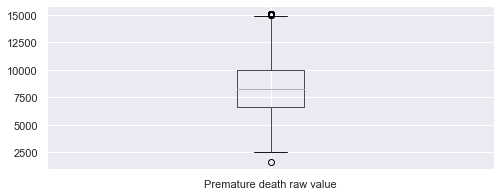

In [29]:
#The below box plot shows all the treated data
processedDataframe.boxplot(column= 'Premature death raw value')
plt.rcParams["figure.figsize"] = (10,3)
plt.show()

In [30]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [31]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    #Fit the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

Clustering technique is used to group the data. 
Elbow technique is used to find the best cluster number

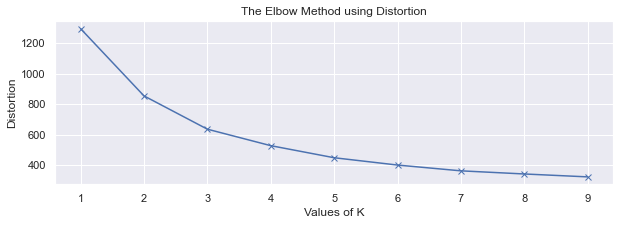

In [32]:
plt.rcParams["figure.figsize"] = (10,3)
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [33]:
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(X)
processedDataframe['label'] = labels


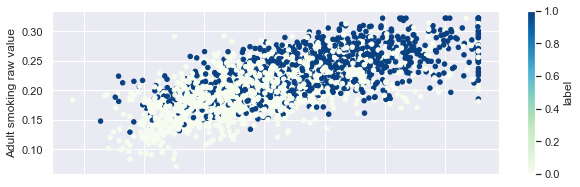

In [34]:
ax1 = processedDataframe.plot.scatter(x='Premature death raw value',
                       y='Adult smoking raw value',
                       c='label', cmap='GnBu')

There are majorly two clusters based on all the features that were fed to the model. From this clusters we can conclude that there are two major distinctions in counties, one county which has overall better standard of living, less adult population who smoke, hence this cluster has lower premature death.

In [35]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

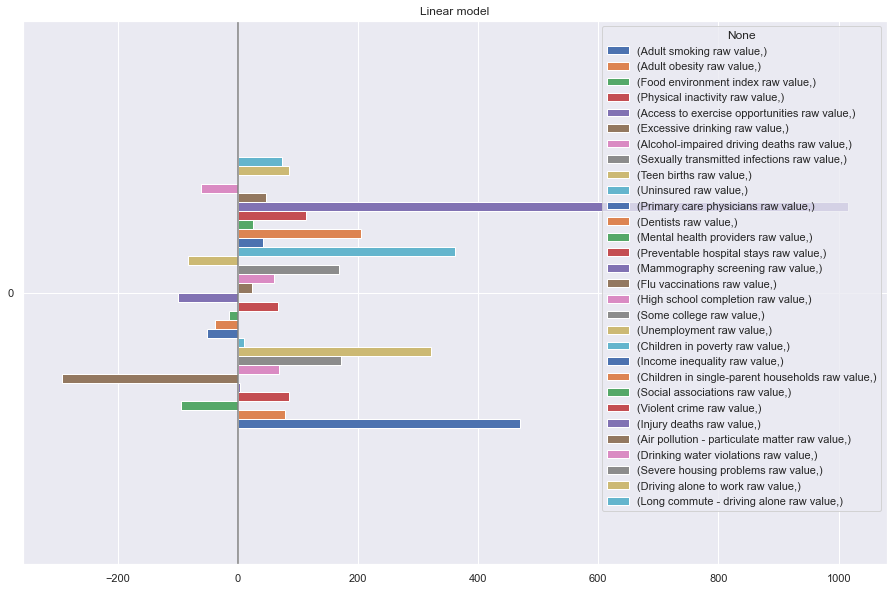

In [36]:
coefs = pd.DataFrame(
   regressor.coef_, columns=X.columns
)
coefs
coefs.plot(kind='barh', figsize=(20, 10))
plt.title('Linear model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

The five most important factor predicting premature death are 
1. Injury deaths
2. Children in poverty
3. Teen births
4. Excessive drinking
5. Adult smoking

In [37]:
y_pred = regressor.predict(X_test)


In [38]:
R_squared = regressor.score(X_train,y_train)
R_squared

0.7709473413100622

In [39]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))

1134.197107523723

In [47]:
#Ridge regression
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

In [48]:
ridge.score(X_train,y_train)

0.7709472739078448

In [49]:
np.sqrt(mean_squared_error(y_test,y_pred_ridge))

1134.1396394395294

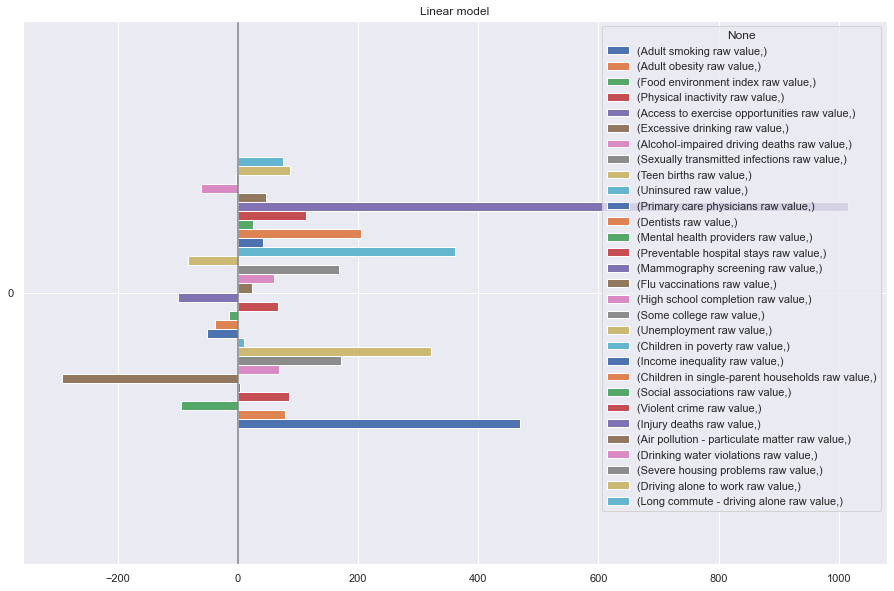

In [43]:
coefs = pd.DataFrame(
   ridge.coef_, columns=X.columns
)
coefs
coefs.plot(kind='barh', figsize=(20, 10))
plt.title('Linear model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

The 5 most important factors predicting pre mature death
1. Injury deaths
2. Children in poverty
3. Teen births
4. Excessive drinking
5. Adult smoking

The recommendations are as below:
1. We have tried two linear regression models to fit the data and explored the accuracy parameters like R-squared and Root mean squared error
The best case scenario would be to have high R squared value and low Root mean squared value.
2. From ridge and linear regression, both of them perform the same way, however ridge regression would be recommended as it has better RMSE and R-squared 
3. The Allenghency county should focus more on the factors mentioned above like there should be some kind of provision to help children in poverty, health efforts to eliminate teen births should be in place, awareness towards excessive drinking